In [8]:
import os
import pandas as pd
import geopandas as gpd
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 2000)
import numpy as np
import scipy.stats
import matplotlib.pyplot as plt
import matplotlib.transforms
plt.style.use('default')

In [65]:
# Import relevant dataframes:

main_table = pd.read_csv(r"C:\Users\Public\_Data\_Data\Latest_Version\Main_Data\Main_Table_10182019.csv")
print(len(main_table))
faculty_table = pd.read_csv(r"C:\Users\Public\_Data\_Data\Latest_Version\Faculty_Data\Faculty_Table_11222019.csv")
print(len(faculty_table))
skill_table = pd.read_csv(r"C:\Users\Public\_Data\_Data\Latest_Version\Skills_Data\Skill_Table_06072019.csv")
print(len(skill_table))

3957167
3957167
36101672


In [68]:
main_table

,Job ID,Year,Job Title,Occupation,Career Area,Minimum EDU Requirements,Maximum EDU Requirements,Minimum Experience Requirements,Annual Salary,Metropolitan Statistical Area,State,IPEDS Institution Name,IPEDS Sector Name,R1,4-year,2-year,Public,Private,BEA_Zone
0,7,2014,Graduate Student For Academic Skill Development,"Administrator, Higher Education",Education and Training,18,-999,2.000000,-999.0,"Lawrence, KS",Kansas,University of Kansas,"Public, 4-year or above",1,1,0,1,0,Plains
1,24,2014,Licensed Practical Nurse- Physician Office - P...,Licensed Practical / Vocational Nurse,Health Care including Nursing,-999,-999,-83.250000,-999.0,"Grenada, MS",Mississippi,University of Mississippi Medical Center,"Public, 4-year or above",0,1,0,1,0,Southeast
2,120,2014,It Opportunities Senior It Support Technician ...,Technical Support Engineer / Analyst,Information Technology,12,16,6.000000,-999.0,"Taos, NM",New Mexico,University of New Mexico-Taos Campus,"Public, 2-year",0,0,1,1,0,Southwest
3,143,2014,Community Social Services Instructor A/,College Professor / Instructor,Education and Training,18,21,5.000000,-999.0,"Mankato-North Mankato, MN",Minnesota,South Central College,"Public, 2-year",0,0,1,1,0,Plains
4,185,2014,Finance And Accounting Intern - Dairy Farmer O...,na,na,16,-999,-83.250000,-999.0,"Portales, NM",New Mexico,Eastern New Mexico University-Main Campus,"Public, 4-year or above",0,1,0,1,0,Southwest
5,697,2014,"Assistant Director, Financial Aid - Scholarships",Financial Manager (General),Finance,16,-999,3.000000,62600.0,"Atlanta-Sandy Springs-Roswell, GA",Georgia,Emory University,"Private not-for-profit, 4-year or above",1,1,0,0,1,Southeast
6,895,2014,"Instructor, Clinical Emergency Services",College Professor / Instructor,Education and Training,18,18,3.000000,-999.0,"Memphis, TN-MS-AR",Tennessee,NaN,NaN,0,0,0,0,0,Southeast
7,1484,2011,Project Director - Taaccct Grant,Project Manager (General),Business Management and Operations,-999,-999,3.000000,-999.0,"Allentown-Bethlehem-Easton, PA-NJ",Pennsylvania,Northampton County Area Community College,"Public, 2-year",0,0,1,1,0,Mideast
8,1485,2011,Program Manager - Sustainable And Renewable En...,Education Program Manager,Business Management and Operations,-999,-999,3.000000,-999.0,"Allentown-Bethlehem-Easton, PA-NJ",Pennsylvania,Northampton County Area Community College,"Public, 2-year",0,0,1,1,0,Mideast
9,1486,2011,Career Coach,Career Counselor,Community and Social Services,-999,-999,2.000000,-999.0,"Allentown-Bethlehem-Easton, PA-NJ",Pennsylvania,Northampton County Area Community College,"Public, 2-year",0,0,1,1,0,Mideast


In [10]:
states = gpd.read_file(r"D:\Downloads\states_21basic\states.shp")
print(len(states))

51


In [3]:
def title_swap(string):
    dictionary = {'Community and Social Services':'Counseling and Religious Life',
                  'Customer and Client Support':'Online Support and University Information',
                  'Hospitality, Food, and Tourism':'Event Management and Hospitality', 
                  'Planning and Analysis':'Analysis', 
                  'Curriculum and Instructional Designer / Developer':'Curriculum and Instructional Designer', 
                  'Special Education Teacher':'Accessibility and Disability Services', 
                  'Teaching Assistant':'Faculty Support', 
                  'Tutor':'Academic Tutor',
                  'Clerical and Administrative':'Administrative'}
    if(string in dictionary):
        return dictionary[string]
    else:
        return string

In [66]:
salary = main_table[main_table['Annual Salary']>0]
mask = salary[['Job ID']]

skill = skill_table.merge(mask, on='Job ID', how='inner')
len(skill)/len(mask)

10.87879846111761

In [35]:
true = pd.DataFrame(main_table['State'].value_counts()).reset_index()
wSal = pd.DataFrame(main_table[main_table['Annual Salary']>0]['State'].value_counts()).reset_index()

def dist(df):
    temp = df.sort_values('index')
    number = temp['State'].sum()
    temp['dist'] = np.true_divide(temp['State'], number)
    return temp

t_dist = dist(true)
t_values = t_dist['dist'].values
s_dist = dist(wSal)
s_values = s_dist['dist'].values

scipy.stats.chisquare(f_obs=s_values, f_exp=t_values)

Power_divergenceResult(statistic=0.15238895174154263, pvalue=1.0)

In [58]:
max = s_values.max()

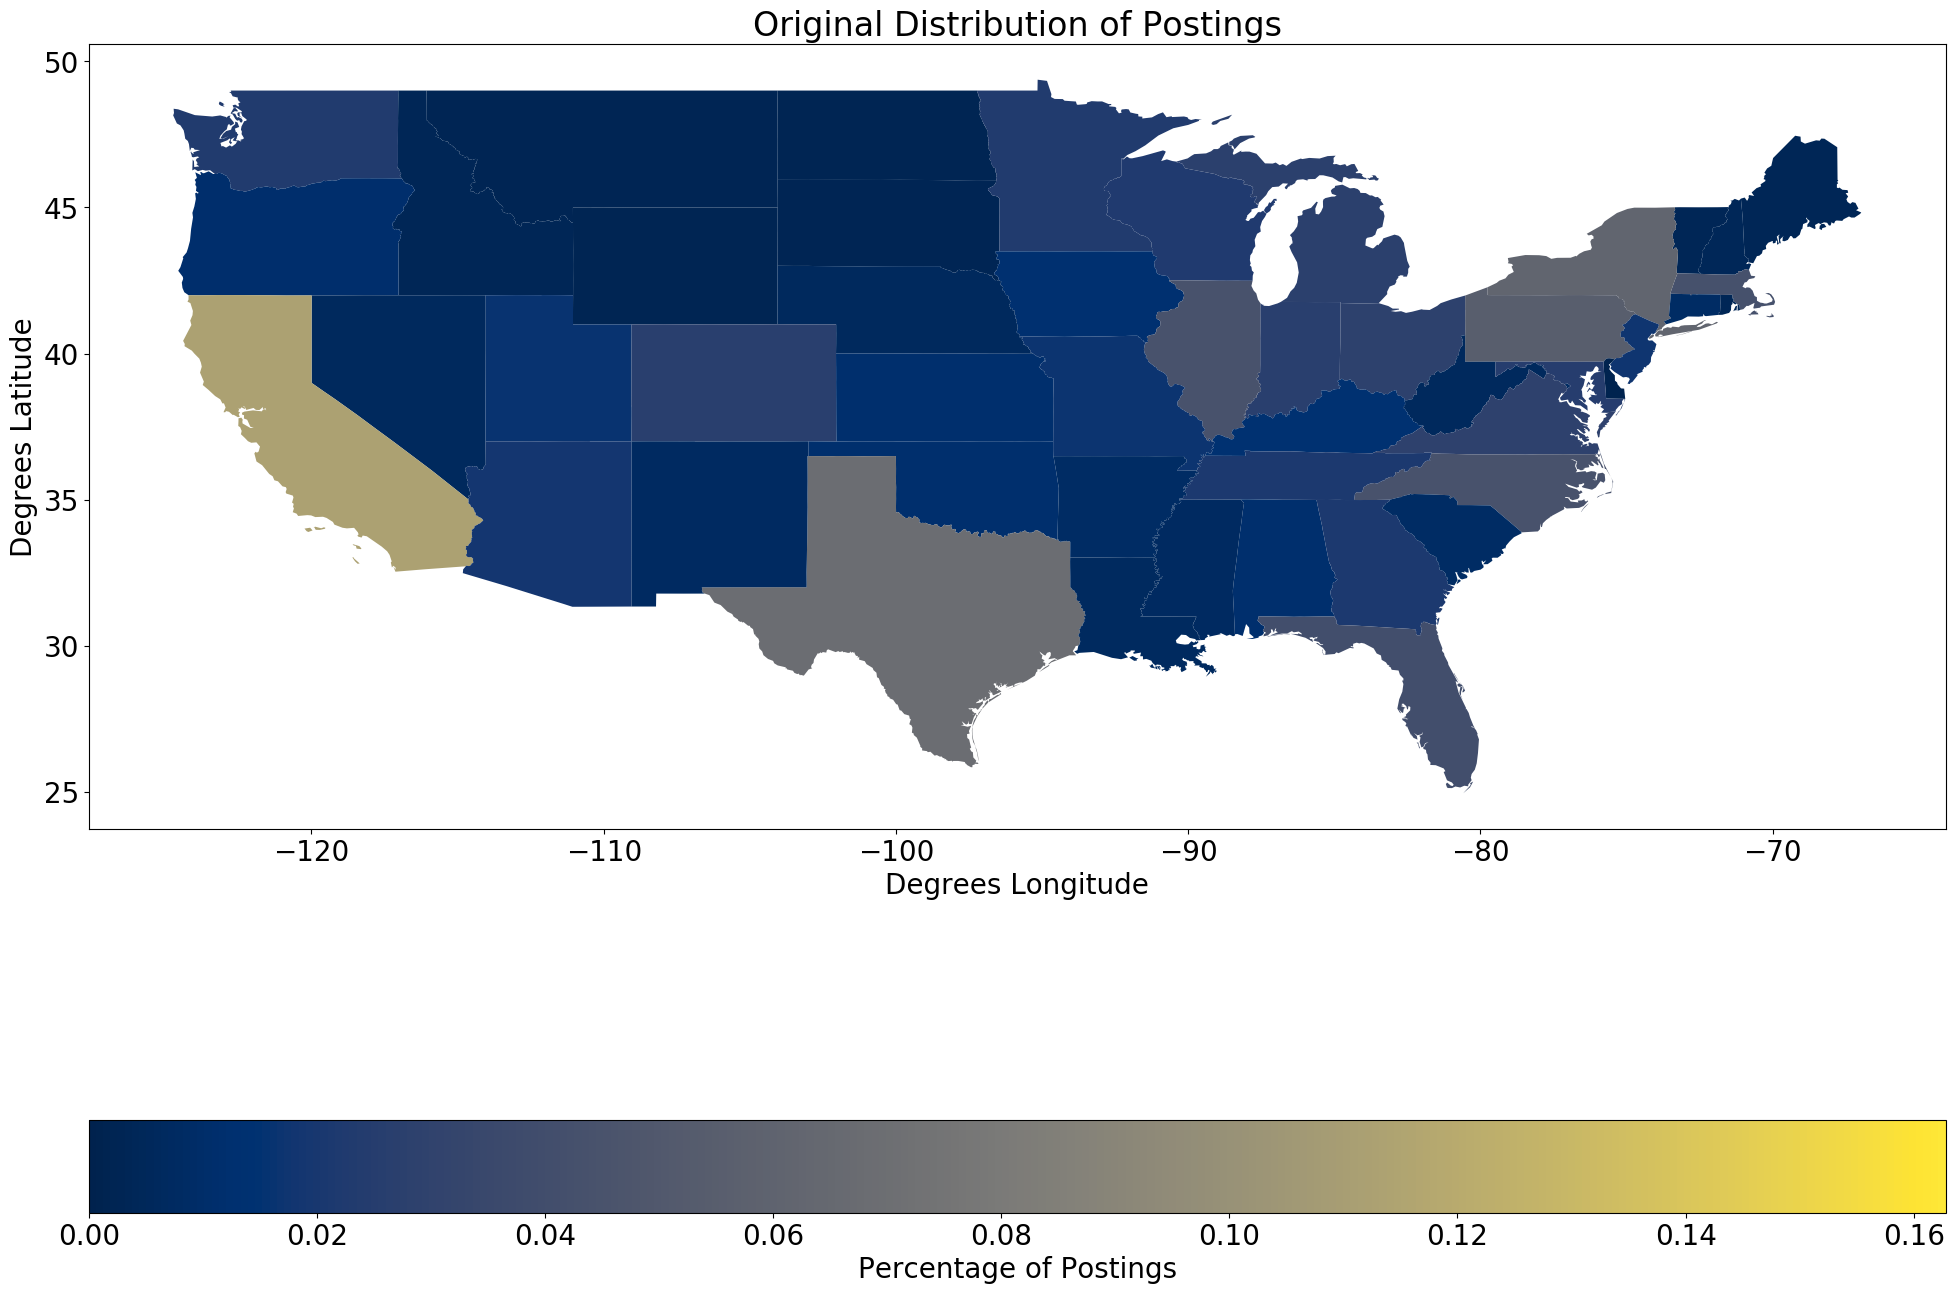

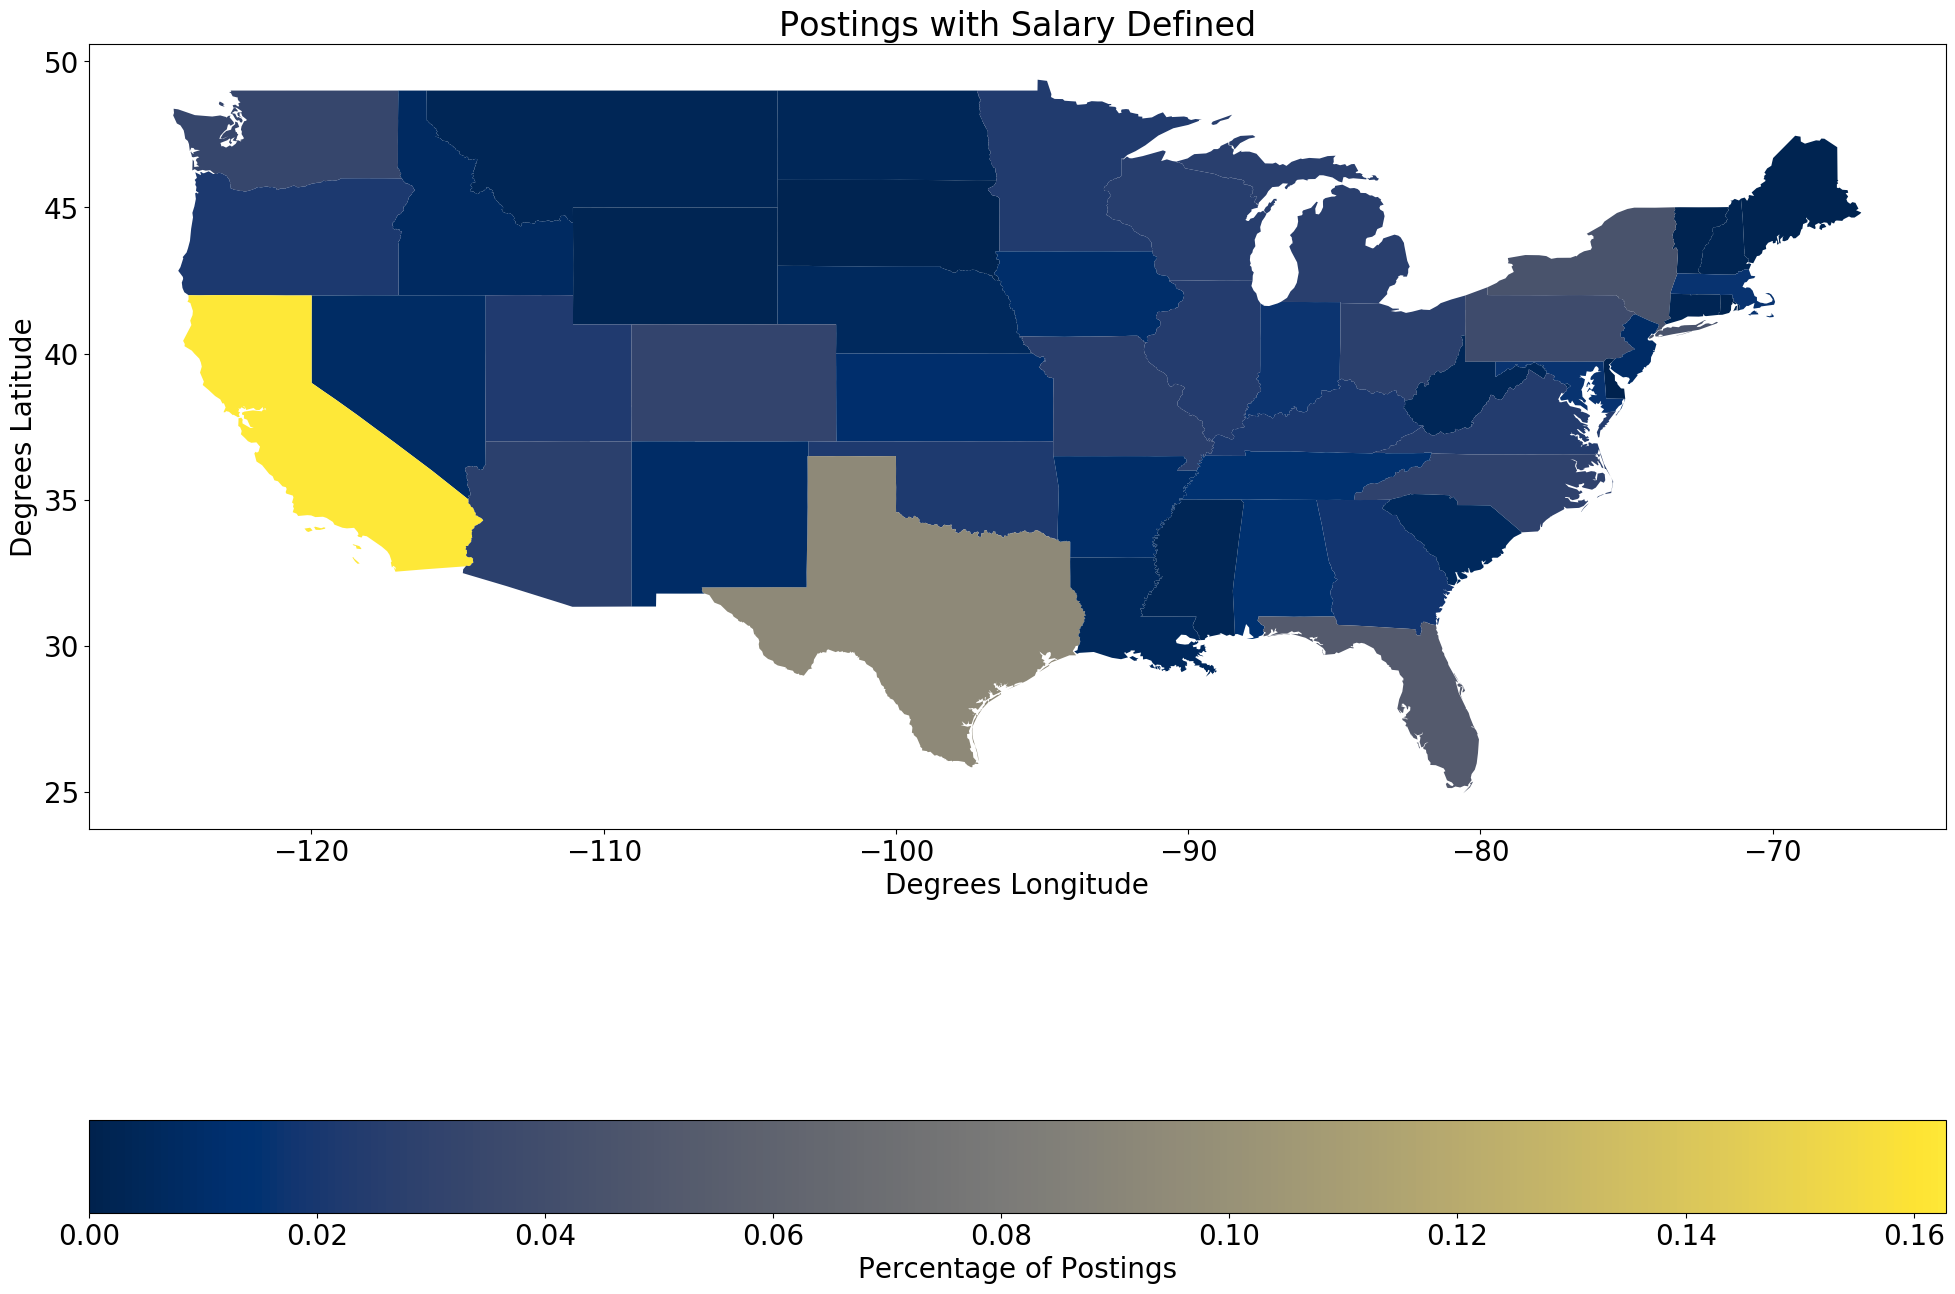

In [63]:
def graph(df, title):
    temp = states.merge(df, left_on='STATE_NAME', right_on='index', how='inner')
    temp = temp.append({'dist' : max}, ignore_index=True)
    temp = temp.append({'dist' : 0}, ignore_index=True)
    temp = temp[~(temp['STATE_NAME']=='Alaska')&~(temp['STATE_NAME']=='Hawaii')]
    temp.plot(column='dist', cmap='cividis', legend=True, legend_kwds={'label': "Percentage of Postings",
                                                                       'orientation': "horizontal"})
    plt.title(title)
    plt.xlabel('Degrees Longitude')
    plt.ylabel('Degrees Latitude')
    plt.rcParams.update({'font.size': 20})
    fig = plt.gcf()
    fig.set_size_inches(20, 20)
    plt.tight_layout()
    
graph(t_dist, 'Original Distribution of Postings')
graph(s_dist, 'Postings with Salary Defined')

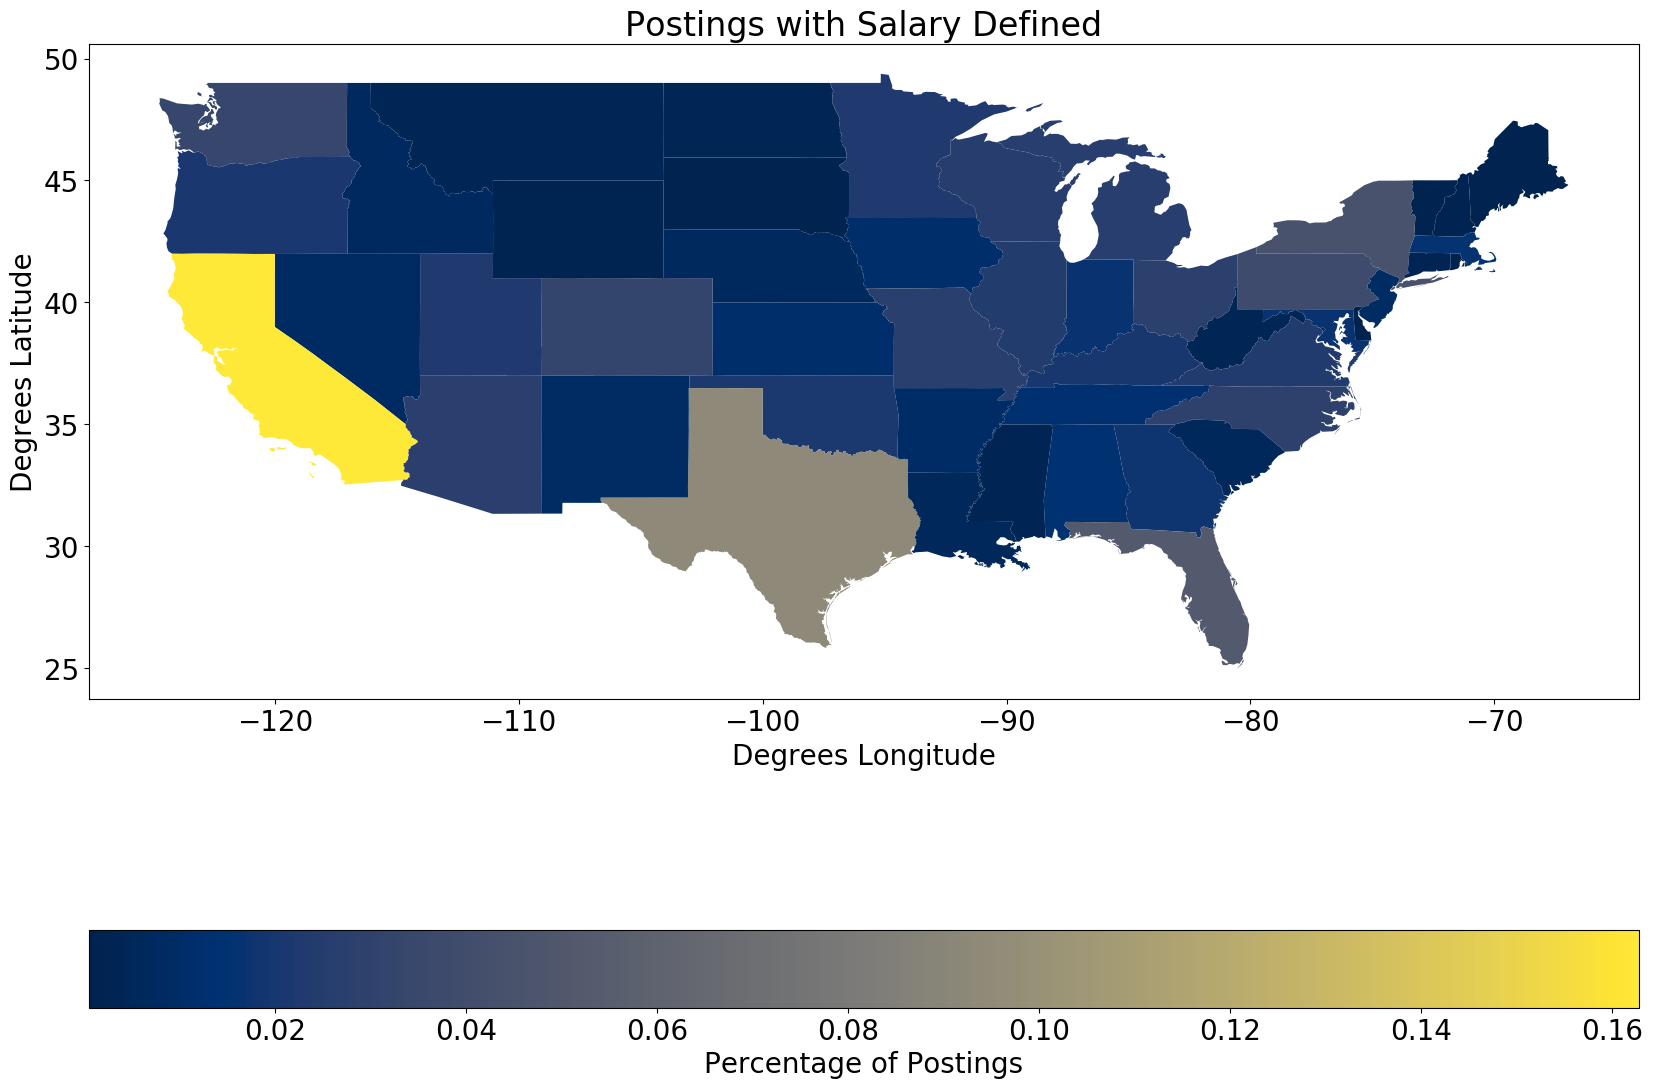

In [49]:
temp = states.merge(s_dist, left_on='STATE_NAME', right_on='index', how='inner')
temp = temp[~(temp['STATE_NAME']=='Alaska')&~(temp['STATE_NAME']=='Hawaii')]
temp.plot(column='dist', cmap='cividis', legend=True, legend_kwds={'label': "Percentage of Postings",
                                                                   'orientation': "horizontal"})
plt.title('Postings with Salary Defined')
plt.xlabel('Degrees Longitude')
plt.ylabel('Degrees Latitude')
plt.rcParams.update({'font.size': 20})
fig = plt.gcf()
fig.set_size_inches(20, 20)
plt.show()

In [21]:
len(main_table[main_table['Annual Salary']>0])

859065

In [22]:
859065/3957167

0.21709091377745746

In [7]:
years = [2007, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017]

df = pd.DataFrame()

df['Year'] = years

tot = []
post = []
fac = []
non = []

for year in years:
    mask = main_table[main_table['Year']==year][['Job ID']]
    total = len(mask)
    temp_fac = faculty_table.merge(mask, on='Job ID', how='inner')
    post_d = len(temp_fac[temp_fac['Post-Doctoral']==1])
    faculty = len(temp_fac[temp_fac['Faculty']==1])
    non_fac = total - (post_d + faculty)
    
    tot.append(total)
    post.append(post_d)
    fac.append(faculty)
    non.append(non_fac)

df['Higher Education'] = tot
df['Postdoc'] = post
df['Faculty'] = fac
df['Non-Faculty'] = non

display(df)

display(df.sum())

,Year,Higher Education,Postdoc,Faculty,Non-Faculty
0,2007,292953,2812,71462,218679
1,2010,268583,3167,69629,195787
2,2011,346276,3307,91199,251770
3,2012,432443,3641,123998,304804
4,2013,509131,3852,134997,370282
5,2014,498445,3649,118789,376007
6,2015,508504,4892,131432,372180
7,2016,530287,5555,127849,396883
8,2017,570545,5697,123527,441321


Year                  18115
Higher Education    3957167
Postdoc               36572
Faculty              992882
Non-Faculty         2927713
dtype: int64

In [ ]:
faculty_table[['Agricultural sciences and natural resources',
               'Biological and biomedical sciences',
               'Health sciences',
               'Chemistry',
               'Geosciences, atmospheric, and ocean sciences',
               'Physics and astronomy',
               'Computer and information sciences',
               'Mathematics and statistics',
               'Psychology',
               'Anthropology',
               'Economics',
               'Political science and government',
               'Sociology',
               'Other social sciences',
               'Aerospace, aeronautical, and astronautical engineering',
               'Bioengineering and biomedical engineering',
               'Chemical engineering',
               'Civil engineering',
               'Electrical, electronics, and communications engineering',
               'Industrial and manufacturing engineering',
               'Materials science engineering',
               'Mechanical engineering',
               'Other engineering',
               'Education administration',
               'Education research',
               'Teacher education',
               'Teaching fields',
               'Other education',
               'Foreign languages and literature',
               'History',
               'Letters',
               'Other humanities and arts',
               'Business management and administration',
               'Communication']]

In [ ]:
# Faculty ratio validation:
school = 'Massachusetts Institute of Technology'
# table = main_table[main_table['IPEDS Institution Name']==school]
table = main_table[main_table['IPEDS Institution Name'].str.contains(school, na=False)]
table = table.merge(faculty_table[['Job ID', 'Faculty', 'Post-Doctoral']])

for i in range(8):
    year = 2010 + i
    print(year)
    temp = table[table['Year']==year]
    groupf = temp[['Job ID', 'Faculty']].groupby('Faculty').count()
    fac = groupf.iloc[1]['Job ID']
    non = groupf.iloc[0]['Job ID']
    groupp = temp[['Job ID', 'Post-Doctoral']].groupby('Post-Doctoral').count()
    print('Faculty\tCount')
    print('1\t' + str(fac))
    print('0\t' + str(non))
    print('Faculty Percentage:', str(round(fac/(fac+non)*100, 2)) + '%\n')


In [ ]:
school = 'Harvard University'
# table = main_table[main_table['IPEDS Institution Name']==school]
table = main_table[main_table['IPEDS Institution Name'].str.contains(school, na=False)]
table = table.merge(faculty_table[['Job ID', 'Faculty', 'Post-Doctoral']])

temp = table[table['Post-Doctoral']==1]
temp = temp[temp['Year']==2015]
print(len(temp))
display(temp)

In [ ]:
# Total Faculty Ratio
faculty_table[['Job ID', 'Faculty']].groupby('Faculty').count()

In [ ]:
main_table[main_table['IPEDS Institution Name'].str.contains('Institute of Technology', na=False)]['IPEDS Institution Name'].value_counts()

In [ ]:
main_table[main_table['IPEDS Institution Name'].str.contains('Tufts', na=False)]['IPEDS Institution Name'].value_counts()

In [ ]:
table = main_table[main_table['IPEDS Institution Name'] == 'Tufts University']
mask = faculty_table[faculty_table['Faculty']==1][['Job ID']]

table = table.merge(mask, on='Job ID', how='inner')
# table = table[table['Year']==2017]
# table = table[table['Occupation']!='College Professor / Instructor']
table = table[table['Occupation']=='Dean of Academic Division']
print(len(table))
table['Job Title'][70]

In [ ]:
table = main_table[main_table['Occupation']=='College Professor / Instructor']
table = table.merge(faculty_table[['Job ID', 'Faculty']], on='Job ID', how='inner')
table[table['Faculty']==0]


In [ ]:
main_table[main_table['IPEDS Institution Name'].isnull()&~(main_table['IPEDS Sector Name'].isnull())]

In [ ]:
table = main_table[main_table['Occupation'].str.contains('Dean', na=False)]
table['Occupation'].value_counts()

In [ ]:
main_table['IPEDS Institution Name'].value_counts()

In [ ]:
# Skills to look for:
"""
# Requirements
Policy analysis                     [yes, cluster]
Policy proposal                     [yes, skill]
Policy research                     [yes, skill]
Policy evaluation                   [yes, skill]
Policy development                  [yes, skill]
Policy implementation               [yes, skill]
Public policy development           [yes, skill]
Social work                         [yes, skill & cluster]
Social services                     [yes, skill]
Social services industry knowledge  [yes, skill & cluster]
Behavioral health                   [yes, skill]
    
# Supplememts
Data management                     [yes, cluster]
Health data management              [yes, cluster]
Research                            [yes, skill]
Health research                     [yes, skill]
Survey research                     [yes, skill]
Research design                     [yes, skill]
Qualitative research                [yes, skill]
Regression analysis                 [yes, skill]
"""

column = 'Skill Cluster Name'
item = 'regression analysis'

table = skill_table[skill_table[column].str.contains(item, case=False, na=False)]
values = pd.DataFrame(table[column].value_counts()).reset_index().sort_values('index')
values

In [ ]:
# List of Primary SP Skills
"""
Social Work
Social Policy
Behavioral Health
Social Services Industry Knowledge 
"""

# List of Secondary SP Skills


In [ ]:
skill = 'Social Work'

category = 'Skill Name'

mask = skill_table[skill_table[category]==skill][['Job ID']]

table = skill_table.merge(mask, on = 'Job ID', how = 'inner')

table['Skill Name'].value_counts()

In [ ]:
mask = skill_table[(skill_table['Skill Name']=='Social Work')|
                   (skill_table['Skill Name']=='Social Services')
                   ][['Job ID']]
# &
#                    (skill_table['Skill Name']=='Research')

# to add another filter: | (skill_table['Skill Name']=='')
mask = mask.drop_duplicates('Job ID')
# print(len(mask))

table = main_table.merge(mask, on='Job ID', how='inner')
print('Number of total Jobs:\n\t' + str(len(table)))

table['Career Area'] = table['Career Area'].apply(title_swap)
table['Occupation'] = table['Occupation'].apply(title_swap)

table = table[(table['Minimum EDU Requirements']>=18)]

print('Number of Jobs with MA or Above:\n\t' + str(len(table)))

mask = pd.DataFrame(table['Occupation'].value_counts()).reset_index().rename(columns={'Occupation':'count', 'index':'Occupation'})
mask = mask[mask['count']>=10][['Occupation']]
table = table.merge(mask, on='Occupation', how='inner')
# print('Number of total Jobs:\n\t', len(table))

mask = faculty_table[(faculty_table['Faculty']==0)&(faculty_table['Post-Doctoral']==0)]['Job ID']
table = table.merge(mask, on='Job ID', how='inner')
print('Number of non-faculty Jobs:\n\t' + str(len(table)))



In [ ]:
# Occupational Breakdowns

In [ ]:
pd.DataFrame(table[['Job ID', 'Career Area', 'Occupation']].groupby(['Career Area', 'Occupation']).count()).rename(columns={'Job ID':'Count'})

In [ ]:
s = pd.DataFrame(table[['Job ID']].merge(skill_table, on='Job ID', how='inner')['Skill Name'].value_counts())

In [ ]:
s

In [ ]:
table[table['Occupation']=='Chief Executive Officer'][['Job ID']].merge(skill_table)

In [ ]:
skills = table[['Job ID']].merge(skill_table, on='Job ID', how='inner')

In [ ]:
index = faculty_table[faculty_table['Faculty']==1]
table = main_table[main_table['Job Title'].str.contains('post-doc', case=False)|main_table['Job Title'].str.contains('post doc', case=False)]

In [ ]:
final = index[['Job ID', 'Post-Doctoral']].merge(table, on='Job ID', how = 'inner')
display(len(final))
final = final[final['Post-Doctoral']==0]
display(len(final))

In [ ]:
final['Job Title'].value_counts()

In [ ]:
table = main_table[main_table['Job Title'].str.contains('post-doc', case=False)|main_table['Job Title'].str.contains('post doc', case=False)]
table = table.merge(faculty_table[['Job ID', 'Faculty', 'Post-Doctoral']], on='Job ID', how='inner')

In [ ]:
main_table[main_table['Occupation'].str.contains('fundraising', case=False)]['Occupation'].value_counts()

In [ ]:
table.groupby(['Faculty', 'Post-Doctoral']).count()

In [ ]:
id = faculty_table[(faculty_table['Faculty']==1)&(faculty_table['Post-Doctoral']==1)]

main_table.merge(id[['Job ID']], on='Job ID', how='inner')['Job Title'].value_counts()

In [ ]:
len(main_table[main_table['Job Title'].str.contains('open rank', case=False, na=False)])

In [ ]:
len(main_table[main_table['Job Title'].str.contains('open-rank', case=False, na=False)])

In [ ]:
len(main_table[main_table['Job Title'].str.contains('open', case=False, na=False) 
    & main_table['Job Title'].str.contains('rank', case=False, na=False)])

In [ ]:
faculty_table[faculty_table['Other humanities and arts']==1].merge(main_table['Job ID'])

In [ ]:
IS_main = pd.read_csv(r"G:\IS_Data\IS_Main.csv")
IS_skill = pd.read_csv(r"G:\IS_Data\IS_Skill.csv")

In [ ]:
IS_main.drop(columns=['Job Title', 'Minimum EDU Requirements', 'Minimum Experience Requirements', 'Unnamed: 0']).to_csv(r"G:\IS_Data\IS_Main.csv")

In [ ]:
IS_skill

In [ ]:
full_table = main_table.merge(faculty_table[['Job ID', 'Faculty']], on='Job ID', how='inner')

full_table = full_table[full_table['Faculty']==0]
full_table = full_table[full_table['Year']==2017]
full_table = full_table[(full_table['Minimum EDU Requirements']==21)]

full_table = full_table[(full_table['Career Area']!='Health Care including Nursing')&(full_table['Career Area']!='na')]

# These Job Titles are omitted because they are likely to hold JD or MD rather than PhD

full_table = full_table[~(full_table['Career Area'].str.contains('attorney', case=False, na=False)) &
                        ~(full_table['Occupation'].str.contains('attorney', case=False, na=False)) &
                        ~(full_table['Job Title'].str.contains('attorney', case=False, na=False)) & 
                        ~(full_table['Job Title'].str.contains('title ix', case=False, na=False)) &
                        ~(full_table['Job Title'].str.contains('director of advancement', case=False, na=False)) &
                        ~(full_table['Job Title'].str.contains('finance manager', case=False, na=False)) & 
                        ~(full_table['Job Title'].str.contains('financial manager', case=False, na=False)) &
                        ~(full_table['Occupation'].str.contains('financial manager', case=False, na=False)) &
                        ~(full_table['Career Area'].str.contains('financial manager', case=False, na=False)) &
                        ~(full_table['IPEDS Institution Name'].str.contains('law', case=False, na=False)) & 
                        ~(full_table['IPEDS Institution Name'].str.contains('medical', case=False, na=False))]

# Remove Elementary school teachers for now, financial occupations as well


In [ ]:
full_table = full_table[full_table['Career Area']=='Education and Training']

full_table = full_table[~full_table['Job Title'].str.contains('professor', case=False, na=False)]
full_table = full_table[~(full_table['Occupation']=='College Professor/Instructor')]

full_table.sort_values(by=['Occupation', 'IPEDS Institution Name'])

In [ ]:
full_table = full_table[full_table['Career Area'].str.contains('Information Technology', case=False, na=False)]

full_table['Occupation'].value_counts()

full_table[(full_table['Occupation']=='Computer Scientist / Researcher')]['Job Title'].value_counts()[:10]

In [ ]:
full_table[full_table['Job Title']=='Law Admissions Counselor']

In [ ]:
pd.Series(' '.join(full_table['Job Title']).lower().split()).value_counts()[:100]

In [ ]:
#############################################################
# Growth of Non-Faculty Job Postings by Career area 2007-2017
#############################################################

# Separate out all columns relevant to this evaluation:
full_table = main_table[['Job ID', 'Year', 'R1', 'Career Area', '4-year', '2-year']].merge(
    faculty_table[['Job ID', 'Faculty', 'Post-Doctoral']], how="inner", on="Job ID")


# Drop non-Faculty
full_table = full_table[(full_table['Faculty'] == 0) & (full_table['Post-Doctoral'] != 1)]

# Drop Career Areas with fewer than 1000 observation in 2017
full_table = full_table[(full_table['Career Area']!='na')]

# Restrict years of window
full_table = full_table[(full_table['Year']==2007)|(full_table['Year'] == 2017)]
# Restrict to R1 Institutions
# full_table = full_table[full_table['R1'] == 1]

table_07 = pd.DataFrame(full_table[full_table['Year']==2007]['Career Area'].value_counts()).reset_index().rename(
    columns={'Career Area':'count_07', 'index':'Career Area'})

table_17 = pd.DataFrame(full_table[full_table['Year']==2017]['Career Area'].value_counts()).reset_index().rename(
    columns={'Career Area':'count_17', 'index':'Career Area'})

final_table = table_07.merge(table_17, on='Career Area', how='inner')

final_table = final_table[final_table['count_17']>999]

final_table['growth'] = round(np.true_divide(final_table['count_17']-final_table['count_07'], final_table['count_07'])*100, 2)

final_table.sort_values(by='growth', ascending=False)

In [ ]:
source_skill_table

In [ ]:
salary = main_table[main_table['Annual Salary']>0]

# pd.DataFrame(salary['IPEDS Institution Name'].value_counts()).reset_index().sort_values(by='index')

# salary[salary['IPEDS Institution Name']=='Brandeis University']

salary.merge(faculty_table[['Job ID', 'Faculty']], on='Job ID', how='inner')['Faculty'].value_counts()

In [ ]:
main_table[main_table['Annual Salary']>100000]

In [ ]:
faculty_table.columns

In [ ]:
pd.Series(' '.join(table['Job Title']).lower().split()).value_counts()

In [ ]:
table = faculty_table[(faculty_table['Other humanities and arts']==1)]
table['Number of Detailed Fields of Study'].value_counts()

In [ ]:
table.sum()

In [ ]:
table = main_table[main_table['Job Title'].str.contains('kinesiology', case=False, na=False)]
table[['Job ID']].merge(faculty_table, on='Job ID', how='inner').sum()

In [ ]:
main_table[main_table['Annual Salary']==200000]['Job ']